### 1.기술통계 한 번에 확인하기

#### 데이터 로딩

In [1]:
import pandas as pd
import os

In [2]:
# 작업디렉토리 변경
os.chdir("./data")

In [3]:
# 변경된 디렉토리 확인
print(os.getcwd())

C:\Users\dxsch\데이터분석\data


In [4]:
hr_info = pd.read_csv("./hr-info.csv", encoding = "EUC-KR")

In [5]:
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


#### 기술통계 확인

In [6]:
# 기본적으로 수치데이터의 통계를 보여줌
hr_info.describe()

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,31.930000,4.660000,1.919900,5987.000000,34.745000
std,7.111114,6.183492,1.748062,1182.676889,40.470971
min,22.000000,0.000000,0.000000,4500.000000,0.000000
25%,27.000000,0.000000,0.000000,5000.000000,4.000000
50%,30.000000,1.000000,1.795000,5600.000000,21.000000
75%,37.000000,8.000000,3.412500,6825.000000,56.750000
max,49.000000,25.000000,4.960000,10200.000000,240.000000


#### 특정데이터 타입 확인하기

In [7]:
# object 타입의 통계치 확인
hr_info.describe(include=["object"])

,EID,ENAME,GENDER,ORG_CD,POS_CD,EDU_LEVEL,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
count,200,200,200,197,200,200,182,200,200,200,49,49,49,200,200
unique,200,200,2,30,9,5,4,91,2,16,8,6,2,6,2
top,E00206,시이오,M,ORG021,P008,학사 학위,2024-03-01,Salesforce,Y,2024-03-01,2024-03-01,이직,N,KOREA,Y
freq,1,1,117,12,55,159,111,24,151,64,19,28,45,102,150


In [8]:
# float 타입의 통계치 확인
hr_info.describe(include=["float"])

,PERFORMANCE_SCORE
count,200.000000
mean,1.919900
std,1.748062
min,0.000000
25%,0.000000
50%,1.795000
75%,3.412500
max,4.960000


### 2. 통계 값 개별로 확인하기

#### sum

In [9]:
# 전체 총 지출 인건비를 확인하자
hr_info["SALARY"].sum()

1197400

#### mean

In [10]:
# 평균연봉 확인하기
hr_info["SALARY"].mean()

5987.0

#### count

In [11]:
# 퇴사한 사람 수 확인하기 : 결측치 고려하지 않고 카운트
hr_info["RETIRE_DATE"].count()

49

In [12]:
# 남/여 비율 확인하기
# 각 범주 별로 카운트
hr_info["GENDER"].value_counts()

GENDER
M    117
F     83
Name: count, dtype: int64

#### unique

In [13]:
# 직원들의 국적 종류를 알아보자.
hr_info["NATION"].unique()

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

#### max, min

In [14]:
# 최대, 최소 근속연수 확인하기
print("최대 : ", hr_info["SERVICE_YEAR"].max())
print("최소 : ", hr_info["SERVICE_YEAR"].min())

최대 :  25
최소 :  0


#### median

In [15]:
# 근속연수 중앙값 확인
hr_info["SERVICE_YEAR"].median()

1.0

In [16]:
hr_info["SERVICE_YEAR"].value_counts()

SERVICE_YEAR
0     73
1     36
2     18
9     11
8     11
7     11
14     7
12     7
13     5
20     4
19     4
18     4
11     3
6      2
24     1
5      1
22     1
25     1
Name: count, dtype: int64

#### 실습 : 교육수준에 따른 평균 연봉을 확인해보자

In [17]:
hr_info["EDU_LEVEL"].value_counts()


EDU_LEVEL
학사 학위      159
석사 학위       17
박사 학위       12
고등학교 졸업     10
전문대 학위       2
Name: count, dtype: int64

In [18]:
hr_info["EDU_LEVEL"].unique()

array(['박사 학위', '학사 학위', '석사 학위', '고등학교 졸업', '전문대 학위'], dtype=object)

In [19]:
hr_level = hr_info["EDU_LEVEL"].unique()
avg_salary = {}

for i in hr_level:
    avg = hr_info[hr_info["EDU_LEVEL" == i]["SALARY"].mean()]
    avg_salary[i] = avg

print(avg_salary)

KeyError: False

In [ ]:
# 강사님
hr_info["EDU_LEVEL"].unique()

In [ ]:
rs = hr_info[hr_info['EDU_LEVEL'] == '박사 학위']
rs['SALARY'].mean()

In [ ]:
for edu_level in hr_info["EDU_LEVEL"].unique():
    rs = hr_info[hr_info['EDU_LEVEL'] == edu_level]
    print(f"{edu_level} : {rs['SALARY'].mean()}")

In [ ]:
# 소스 리팩토링
for edu_level in hr_info["EDU_LEVEL"].unique():
    print(edu_level, hr_info[hr_info['EDU_LEVEL'] == edu_level]['SALARY'].mean())

### 3. 데이터 그룹화를 이용한 통계분석

#### groupby 사용기본

In [ ]:
hr_info[['SALARY','EDU_LEVEL']].groupby(by="EDU_LEVEL").mean()

In [ ]:
# GROUP BY 형식 확인하기
for idx, df in hr_info[['SALARY','EDU_LEVEL']].groupby(by="EDU_LEVEL") :
    print(idx)
    print(df)

In [ ]:
#### 두 개 이상의 기준으로 그룹화

In [25]:
# 교육수준과 성별에 따른 평균연봉 확인
hr_info[['SALARY', 'EDU_LEVEL', 'GENDER']].groupby(by=['EDU_LEVEL','GENDER']).mean()

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

#### 그룹화 후 여러 통계값 확인하기

In [26]:
# 교육수준과 성별에 따른 평균연봉 확인
hr_info[['SALARY', 'EDU_LEVEL', 'GENDER']].groupby(by=['EDU_LEVEL','GENDER']).agg(['mean', 'max', 'min', 'median'])

SALARY                     
                         mean    max   min  median
EDU_LEVEL GENDER                                  
고등학교 졸업   F       6200.000000   8500  4500  5900.0
          M       6100.000000   7100  4500  6250.0
박사 학위     F       8425.000000   9500  7100  8550.0
          M       8037.500000  10200  5800  8050.0
석사 학위     F       7233.333333   8600  5700  7000.0
          M       6525.000000   7500  5100  6850.0
전문대 학위    F       5600.000000   5600  5600  5600.0
          M       4500.000000   4500  4500  4500.0
학사 학위     F       5643.076923   7400  4500  5600.0
          M       5785.106383   8500  4500  5600.0

#### 그룹화 후 컬럼별로 다른 연산 적용하기

In [ ]:
hr_info

In [ ]:
# 국적에 따른 평균 성과평가점수와 최대연봉 확인하기
hr_info.groupby(by='NATION').agg({'PERFORMANCE_SCORE':'mean', 'SALARY':'max'})

### 4. 상관계수
- 두 변수 사이의 관계를 수치화하여 보는 방법

#### 분산
- 확률변수가 기댓값으로부터 얼마나 떨어진 곳에 분포하는지를 가늠하는 숫자

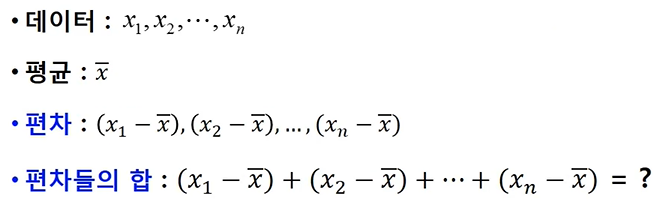

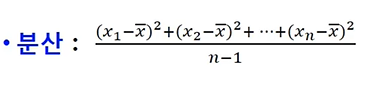

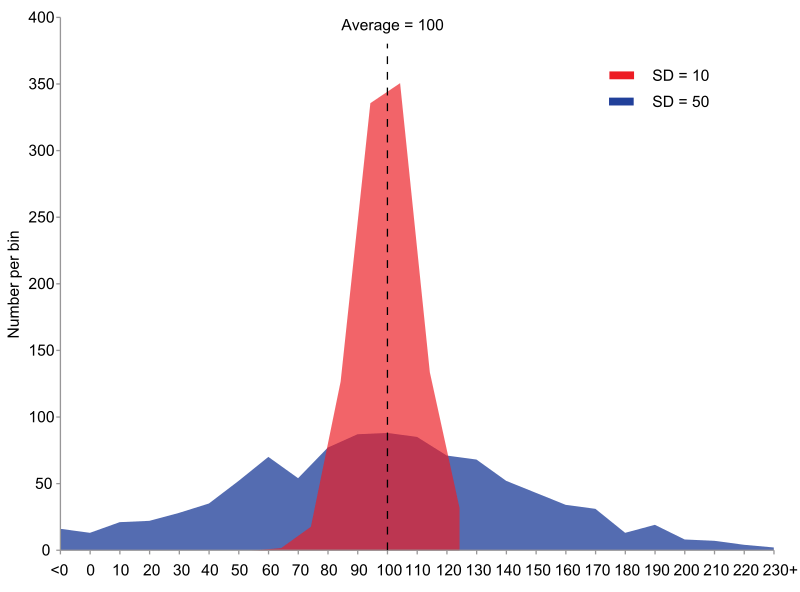

#### 공분산
- 하나의 변수가 아닌 여러개의 변수, 즉 두개의 변수로 구한 분산 값

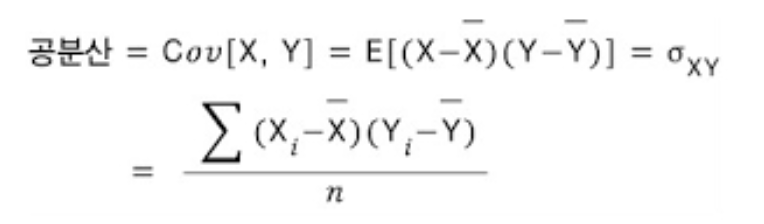

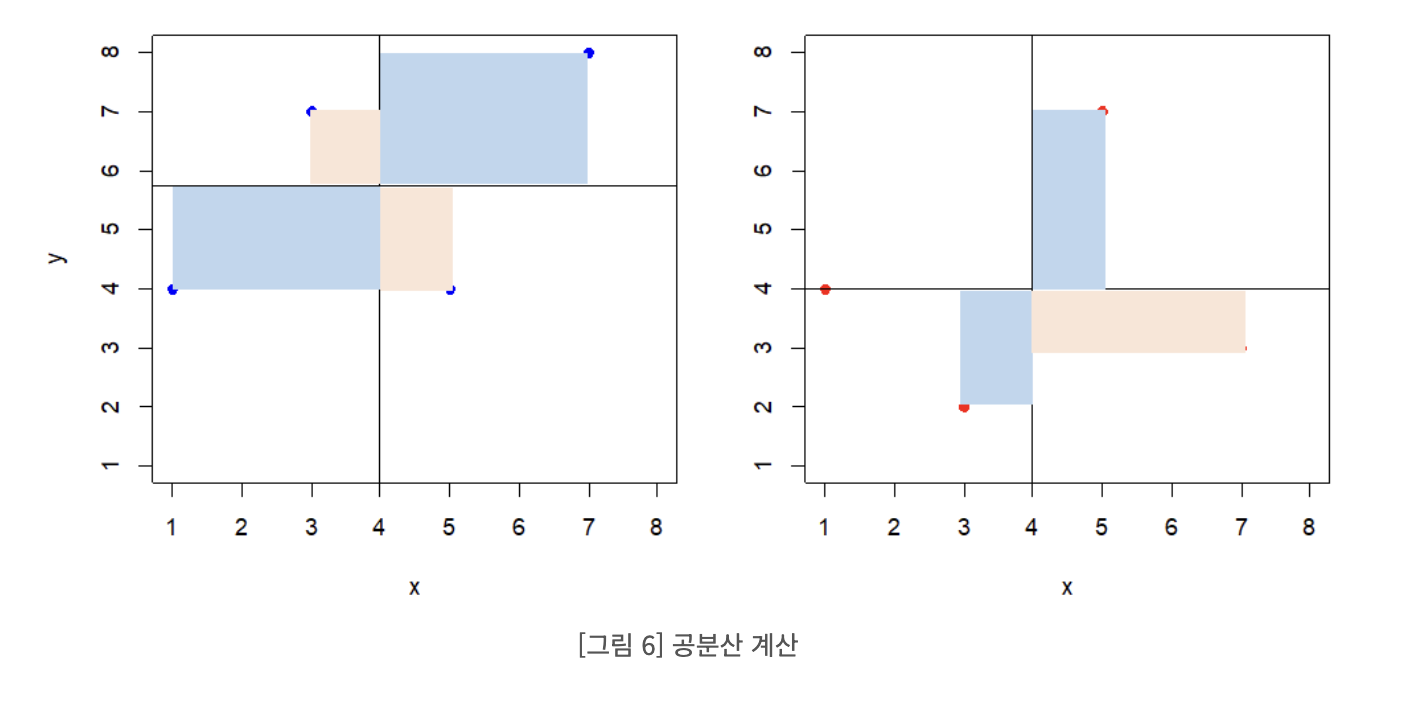

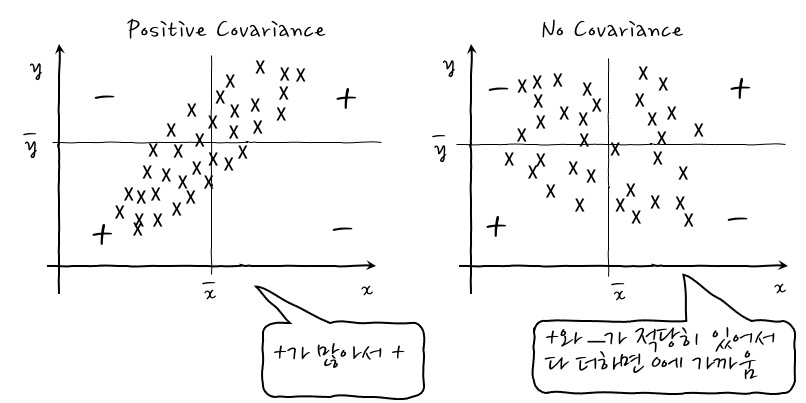

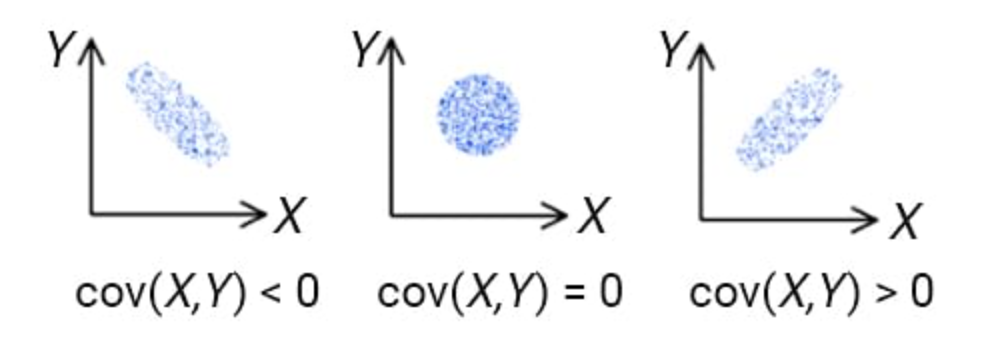

반비례, 비례 관계에 대해 알 수 있다.
- 공분산 값이 0보다 크다 -> 두 변수는 비례하는 관계
- 공분산 값이 0보다 작다 -> 두 변수는 반비례하는 관계
- 공분산 값이 0에 가깝다 -> 두 변수는 서로 영항을 주지 x 

#### 상관계수
- 공분산 값을 -1 ~ 1 값으로 정규화한 값

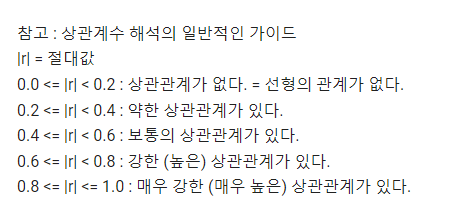

현재는 초거대 데이터의 시대이다. 이젠 데이터의 양이 중요하다.
- 상관계수는 데이터가 많으면 중요도가 떨어진다.
- 인공지능 분야에서는 사례를 많이 보여줄 수 있고, 데이터를 많이 가질 수 있어 그 안에서 규칙을 찾으려고 한다.

In [20]:
# 직원 성과평가점수와 연봉의 상관계수 확인
hr_info[["PERFORMANCE_SCORE", "SALARY"]].corr()

,PERFORMANCE_SCORE,SALARY
PERFORMANCE_SCORE,1.000000,0.609152
SALARY,0.609152,1.000000


In [24]:
# 수치데이터의 전체 상관계수 확인
hr_info[["PERFORMANCE_SCORE", "SALARY", "AGE", "SERVICE_YEAR", "TRAINING_HOURS"]].corr()

# 근속연수와 연봉의 상관관계가 높다

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000
